# Proyek Analisis Data: [PRSA AIR DATA QUALITY CONTROL]
- **Nama:** WILDAN FADHIL NAZARUDDIN
- **Email:** wildanfadhil76@gmail.com
- **ID Dicoding:** 

## Menentukan Pertanyaan 

- Pertanyaan 1 :
    - kota mana yang memiliki pm 2.5 dan pm 10 yang paling tinggi dengan periode tahun 2013-2017
- Pertanyaan 2 :
    - bagaimana kualitas udara yang terjadi pada rentang tahun 2013 - 2017
    

## Import Semua Packages/Library yang Digunakan

In [29]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np
import os
# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk analisis statistik dan machine learning
from scipy import stats

# Libry untuk melihat mising valeu
import missingno as msno
import matplotlib.pyplot as plt

# Libry untuk Visualisasi Data
import plotly.express as px

## Data Wrangling

### Gathering Data

In [30]:
def load_data():
    current_dir = os.getcwd()  # Mendapatkan direktori saat ini
    csv_files = [f"PRSA_Data_{city}_20130301-20170228.csv" for city in [
        "Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guanyuan", 
        "Gucheng", "Huairou", "Nongzhanguan", "Shunyi", "Tiantan", 
        "Wanliu", "Wanshouxigong"
    ]]
    
    dataframes = {}
    for csv_file in csv_files:
        file_path = os.path.join(current_dir, "data", csv_file)
        df = pd.read_csv(file_path)  # Membaca file CSV
        location = csv_file.split('_')[2]
        dataframes[location] = df

    # Membuat variabel global untuk setiap DataFrame
    for location, df in dataframes.items():
        globals()[location] = df
    
    return dataframes

# Memuat data dan inisialisasi variabel
dataframes = load_data()

In [31]:
# Menampilkan 5 baris pertama dari dataset 'Huairou'
Huairou.head(5)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


**Insight:**
1. Distribusi Data Berdasarkan Waktu
Tren Musiman dan Tahunan: Berdasarkan kolom year, month, dan day, kita dapat menganalisis tren tahunan atau bulanan untuk melihat bagaimana kualitas udara (PM2.5, PM10, dll.) berubah sepanjang tahun.
Misalnya, apakah PM2.5 lebih tinggi pada bulan-bulan tertentu?
Korelasi Waktu dengan Polutan: Melihat apakah ada pola atau tren tertentu antara jam (hour) dan tingkat polusi. Misalnya, apakah tingkat polusi lebih tinggi pada jam-jam tertentu?
2. Statistik Polutan (PM2.5, PM10, SO2, NO2, CO, O3)
Rata-rata Polutan: Hitung nilai rata-rata dari setiap polutan (PM2.5, PM10, SO2, NO2, CO, O3) untuk melihat bagaimana kualitas udara secara keseluruhan di setiap stasiun atau pada waktu tertentu.
Standar Deviasi dan Variabilitas: Mengukur seberapa besar variabilitas tingkat polutan di berbagai waktu dan lokasi.
Outliers dan Nilai Hilang: Dari contoh data, kita dapat melihat bahwa ada nilai NaN di beberapa kolom (misalnya pada NO2, PM2.5, dll.). Ini perlu dianalisis lebih lanjut untuk mengidentifikasi apakah ada pola atau kesalahan dalam pengumpulan data.
3. Faktor Cuaca (Suhu, Tekanan, Kelembapan, Angin)
Korelasi Antara Polutan dan Cuaca: Analisis apakah terdapat hubungan antara cuaca (suhu TEMP, tekanan PRES, kelembapan DEWP) dengan tingkat polutan. Misalnya, apakah tingkat polusi cenderung lebih tinggi saat suhu rendah atau tekanan tinggi?
Kecepatan Angin dan Polusi (WSPM): Apakah ada hubungan antara kecepatan angin dan tingkat polusi? Angin dapat mempengaruhi distribusi polutan di udara.
4. Analisis Stasiun Pengamatan
Perbandingan Antar Stasiun: Berdasarkan kolom station, kita bisa melakukan analisis perbandingan antara stasiun yang berbeda. Misalnya, apakah polutan seperti PM2.5 atau PM10 lebih tinggi di stasiun tertentu?
Tren Spasial: Jika data terdiri dari beberapa stasiun di berbagai lokasi, kita dapat melihat tren geografis polusi udara di setiap wilayah.
5. Kualitas Data
Menangani Nilai Hilang (Missing Data): Identifikasi kolom yang memiliki banyak data hilang, misalnya NO2 dan SO2 dalam beberapa baris. Nilai hilang ini bisa diisi menggunakan teknik interpolasi atau dengan menggunakan nilai rata-rata/median jika diperlukan.
Penghapusan atau Perbaikan Outlier: Mengidentifikasi dan memperbaiki nilai yang tidak wajar (outlier) untuk memastikan kualitas data lebih baik.
6. Distribusi Angin
Analisis Angin Berdasarkan Arah (wd): Kolom wd menunjukkan arah angin. Kita bisa melakukan analisis distribusi arah angin untuk melihat apakah ada arah angin yang lebih dominan atau apakah ada korelasi dengan polutan.

### Assessing Data

In [32]:
def missing_values_table(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    percentage_missing = (missing_data / len(df)) * 100

    missing_summary = pd.DataFrame({
        'Column': missing_data.index,
        'Missing Values': missing_data.values,
        'Percentage': percentage_missing.values
    })
    
    return missing_summary


In [33]:
# **Insight:** 


# Fungsi untuk membuat ringkasan missing values dalam bentuk tabel
def missing_values_table(df, location):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=True)  # Urutkan ascending
    percentage_missing = (missing_data / len(df)) * 100

    missing_summary = pd.DataFrame({
        'Column': missing_data.index,
        'Missing Values': missing_data.values,
        'Percentage': percentage_missing.values
    })
    
    missing_summary.index = range(1, len(missing_summary) + 1)  # Atur index mulai dari 1
    return missing_summary

# Loop untuk menampilkan ringkasan missing values untuk setiap dataframe
for location, df in dataframes.items():
    print(f"Missing Values Summary for {location}:")
    display(missing_values_table(df, location))


Missing Values Summary for Aotizhongxin:


,Column,Missing Values,Percentage
1,WSPM,14,0.039927
2,TEMP,20,0.057039
3,DEWP,20,0.057039
4,PRES,20,0.057039
5,RAIN,20,0.057039
6,wd,81,0.231006
7,PM10,718,2.047684
8,PM2.5,925,2.638033
9,SO2,935,2.666553
10,NO2,1023,2.917522


Missing Values Summary for Changping:


,Column,Missing Values,Percentage
1,WSPM,43,0.122633
2,PRES,50,0.142596
3,RAIN,51,0.145448
4,TEMP,53,0.151152
5,DEWP,53,0.151152
6,wd,140,0.399270
7,PM10,582,1.659822
8,O3,604,1.722564
9,SO2,628,1.791011
10,NO2,667,1.902236


Missing Values Summary for Dingling:


,Column,Missing Values,Percentage
1,WSPM,43,0.122633
2,PRES,50,0.142596
3,RAIN,51,0.145448
4,TEMP,53,0.151152
5,DEWP,53,0.151152
6,wd,140,0.399270
7,PM10,656,1.870865
8,SO2,730,2.081907
9,PM2.5,779,2.221652
10,O3,1214,3.462240


Missing Values Summary for Dongsi:


,Column,Missing Values,Percentage
1,WSPM,14,0.039927
2,TEMP,20,0.057039
3,DEWP,20,0.057039
4,PRES,20,0.057039
5,RAIN,20,0.057039
6,wd,78,0.222450
7,PM10,553,1.577116
8,SO2,663,1.890828
9,O3,664,1.893680
10,PM2.5,750,2.138946


Missing Values Summary for Guanyuan:


,Column,Missing Values,Percentage
1,WSPM,14,0.039927
2,TEMP,20,0.057039
3,DEWP,20,0.057039
4,PRES,20,0.057039
5,RAIN,20,0.057039
6,wd,81,0.231006
7,PM10,429,1.223477
8,SO2,474,1.351814
9,PM2.5,616,1.756788
10,NO2,659,1.879420


Missing Values Summary for Gucheng:


,Column,Missing Values,Percentage
1,WSPM,42,0.119781
2,RAIN,43,0.122633
3,PRES,50,0.142596
4,TEMP,51,0.145448
5,DEWP,51,0.145448
6,wd,159,0.453457
7,PM10,381,1.086585
8,SO2,507,1.445927
9,PM2.5,646,1.842345
10,NO2,668,1.905088


Missing Values Summary for Huairou:


,Column,Missing Values,Percentage
1,WSPM,49,0.139744
2,TEMP,51,0.145448
3,DEWP,53,0.151152
4,PRES,53,0.151152
5,RAIN,55,0.156856
6,wd,302,0.861282
7,PM10,777,2.215948
8,PM2.5,953,2.717887
9,SO2,980,2.794889
10,O3,1151,3.282569


Missing Values Summary for Nongzhanguan:


,Column,Missing Values,Percentage
1,WSPM,14,0.039927
2,TEMP,20,0.057039
3,DEWP,20,0.057039
4,PRES,20,0.057039
5,RAIN,20,0.057039
6,wd,78,0.222450
7,PM10,440,1.254848
8,SO2,446,1.271960
9,O3,506,1.443076
10,PM2.5,628,1.791011


Missing Values Summary for Shunyi:


,Column,Missing Values,Percentage
1,WSPM,44,0.125485
2,TEMP,51,0.145448
3,RAIN,51,0.145448
4,PRES,51,0.145448
5,DEWP,54,0.154004
6,wd,483,1.377481
7,PM10,548,1.562856
8,PM2.5,913,2.603810
9,SO2,1296,3.696099
10,NO2,1365,3.892882


Missing Values Summary for Tiantan:


,Column,Missing Values,Percentage
1,WSPM,14,0.039927
2,TEMP,20,0.057039
3,DEWP,20,0.057039
4,PRES,20,0.057039
5,RAIN,20,0.057039
6,wd,78,0.222450
7,PM10,597,1.702601
8,PM2.5,677,1.930755
9,NO2,744,2.121834
10,O3,843,2.404175


Missing Values Summary for Wanliu:


,Column,Missing Values,Percentage
1,WSPM,14,0.039927
2,TEMP,20,0.057039
3,DEWP,20,0.057039
4,PRES,20,0.057039
5,RAIN,20,0.057039
6,wd,123,0.350787
7,PM10,284,0.809948
8,PM2.5,382,1.089436
9,SO2,575,1.639859
10,NO2,1070,3.051563


Missing Values Summary for Wanshouxigong:


,Column,Missing Values,Percentage
1,WSPM,13,0.037075
2,TEMP,19,0.054187
3,DEWP,19,0.054187
4,PRES,19,0.054187
5,RAIN,19,0.054187
6,wd,79,0.225302
7,PM10,484,1.380333
8,SO2,669,1.907940
9,PM2.5,696,1.984942
10,NO2,754,2.150354


### Cleaning Data

In [34]:
def interpolate_missing_values(df, missing_threshold=0.05):
    # Membuat kolom 'time' dari 'year', 'month', 'day', dan 'hour'
    if 'year' in df.columns and 'month' in df.columns and 'day' in df.columns and 'hour' in df.columns:
        df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

        df.set_index('time', inplace=True)

        df_interpolated = df.interpolate(method='time')

        columns_to_drop = [col for col in df_interpolated.columns if df_interpolated[col].isnull().mean() > missing_threshold]
        df_interpolated.drop(columns=columns_to_drop, inplace=True)

        df_interpolated.reset_index(inplace=True)

        return df_interpolated
    else:
        print("Kolom 'year', 'month', 'day', atau 'hour' tidak ditemukan dalam dataset.")
        return df

# Terapkan fungsi ini untuk semua dataframes
for location, df in dataframes.items():
    print(f"Interpolating Missing Values for {location}...")
    dataframes[location] = interpolate_missing_values(df)
    print(f"Interpolation complete for {location}.")


Interpolating Missing Values for Aotizhongxin...
Interpolation complete for Aotizhongxin.
Interpolating Missing Values for Changping...
Interpolation complete for Changping.
Interpolating Missing Values for Dingling...
Interpolation complete for Dingling.
Interpolating Missing Values for Dongsi...
Interpolation complete for Dongsi.
Interpolating Missing Values for Guanyuan...
Interpolation complete for Guanyuan.
Interpolating Missing Values for Gucheng...
Interpolation complete for Gucheng.
Interpolating Missing Values for Huairou...
Interpolation complete for Huairou.
Interpolating Missing Values for Nongzhanguan...


/tmp/ipykernel_64499/463944130.py:8: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipykernel_64499/463944130.py:8: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipykernel_64499/463944130.py:8: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipykernel_64499/463944130.py:8: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipykernel_64499/463944130.py:8: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_object

Interpolation complete for Nongzhanguan.
Interpolating Missing Values for Shunyi...
Interpolation complete for Shunyi.
Interpolating Missing Values for Tiantan...
Interpolation complete for Tiantan.
Interpolating Missing Values for Wanliu...
Interpolation complete for Wanliu.
Interpolating Missing Values for Wanshouxigong...
Interpolation complete for Wanshouxigong.


/tmp/ipykernel_64499/463944130.py:8: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipykernel_64499/463944130.py:8: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipykernel_64499/463944130.py:8: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [35]:
# **Insight:** 


# Fungsi untuk membuat ringkasan missing values dalam bentuk tabel
def missing_values_table(df, location):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=True)  # Urutkan ascending
    percentage_missing = (missing_data / len(df)) * 100

    missing_summary = pd.DataFrame({
        'Column': missing_data.index,
        'Missing Values': missing_data.values,
        'Percentage': percentage_missing.values
    })
    
    missing_summary.index = range(1, len(missing_summary) + 1)  # Atur index mulai dari 1
    return missing_summary

# Loop untuk menampilkan ringkasan missing values untuk setiap dataframe
for location, df in dataframes.items():
    print(f"Missing Values Summary for {location}:")
    display(missing_values_table(df, location))


Missing Values Summary for Aotizhongxin:


,Column,Missing Values,Percentage
1,wd,81,0.231006


Missing Values Summary for Changping:


,Column,Missing Values,Percentage
1,wd,140,0.39927


Missing Values Summary for Dingling:


,Column,Missing Values,Percentage
1,NO2,2,0.005704
2,wd,140,0.399270


Missing Values Summary for Dongsi:


,Column,Missing Values,Percentage
1,wd,78,0.22245


Missing Values Summary for Guanyuan:


,Column,Missing Values,Percentage
1,wd,81,0.231006


Missing Values Summary for Gucheng:


,Column,Missing Values,Percentage
1,NO2,20,0.057039
2,wd,159,0.453457


Missing Values Summary for Huairou:


,Column,Missing Values,Percentage
1,wd,302,0.861282


Missing Values Summary for Nongzhanguan:


,Column,Missing Values,Percentage
1,wd,78,0.22245


Missing Values Summary for Shunyi:


,Column,Missing Values,Percentage
1,wd,483,1.377481


Missing Values Summary for Tiantan:


,Column,Missing Values,Percentage
1,wd,78,0.22245


Missing Values Summary for Wanliu:


,Column,Missing Values,Percentage
1,wd,123,0.350787


Missing Values Summary for Wanshouxigong:


,Column,Missing Values,Percentage
1,wd,79,0.225302


## Exploratory Data Analysis (EDA)

### Explore PM 2.5 Dan PM.10

#### PM 2.5

In [36]:
def analisis_pm25_tertinggi(dataframes, year):
    results = []
    for city, df in dataframes.items():
        # Filter data berdasarkan tahun
        filtered_df = df[(df['year'] == year) & (df['month'] >= 1) & (df['month'] <= 12)]
        monthly_avg = (
            filtered_df.groupby('month')
            .agg(avg_PM25=('PM2.5', 'mean'))
            .reset_index()
        )
        # Membulatkan hasil rata-rata PM2.5
        monthly_avg['avg_PM25'] = monthly_avg['avg_PM25'].round()
        monthly_avg['city'] = city
        results.append(monthly_avg)

    # Menggabungkan semua data kota
    combined_df = pd.concat(results, ignore_index=True)

    # Menyimpan hasil akhir dengan kota yang berbeda untuk setiap bulan
    highest_pm25_per_month = pd.DataFrame()
    used_cities = set()
    for month in range(1, 13):
        month_data = combined_df[combined_df['month'] == month]
        month_data = month_data[~month_data['city'].isin(used_cities)]
        if not month_data.empty:
            highest_row = month_data.loc[month_data['avg_PM25'].idxmax()]
            highest_row = highest_row.to_frame().T  # Mengonversi Series ke DataFrame dengan transposisi
            highest_pm25_per_month = pd.concat([highest_pm25_per_month, highest_row], ignore_index=True)
            used_cities.add(highest_row['city'].values[0])

    return highest_pm25_per_month

# Contoh penggunaan untuk tahun 2013 hingga 2017
for year in range(2013, 2018):
    max_per_month_df = analisis_pm25_tertinggi(dataframes, year)
    print(f"Hasil analisis untuk tahun {year}:")
    print(max_per_month_df[['month', 'city', 'avg_PM25']])


Hasil analisis untuk tahun 2013:
  month           city avg_PM25
0     3   Aotizhongxin    110.0
1     4  Wanshouxigong     79.0
2     5         Wanliu     93.0
3     6        Tiantan    110.0
4     7   Nongzhanguan     75.0
5     8         Dongsi     64.0
6     9       Guanyuan     80.0
7    10        Gucheng     96.0
8    11         Shunyi     67.0
9    12      Changping     67.0
Hasil analisis untuk tahun 2014:
   month           city avg_PM25
0      1  Wanshouxigong    117.0
1      2         Wanliu    162.0
2      3         Dongsi    100.0
3      4      Changping    104.0
4      5   Aotizhongxin     71.0
5      6       Guanyuan     60.0
6      7        Huairou     96.0
7      8        Tiantan     66.0
8      9        Gucheng     72.0
9     10   Nongzhanguan    137.0
10    11         Shunyi     81.0
11    12       Dingling     48.0
Hasil analisis untuk tahun 2015:
   month           city avg_PM25
0      1   Nongzhanguan    108.0
1      2         Dongsi    109.0
2      3   Aotizhongx

**Insight:**
- Pada bulan-bulan tertentu seperti Januari dan Februari, mungkin terjadi peningkatan PM2.5, yang bisa jadi dipengaruhi oleh kondisi cuaca atau peningkatan aktivitas domestik (misalnya pembakaran bahan bakar fosil untuk pemanasan).
- Kota dengan PM2.5 Tertinggi: Menyusun perbandingan antara kota-kota berdasarkan nilai rata-rata PM2.5 mereka, kita bisa mengetahui kota mana yang lebih sering terpapar polusi udara tinggi.
- Tren Polusi di Kota-Kota Tertentu: Analisis perbandingan antar kota untuk melihat mana yang memiliki tingkat polusi yang lebih tinggi dan lebih konsisten selama periode waktu tersebut.
- Kota-kota seperti Wanshouxigong, Nongzhanguan, dan Aotizhongxin cenderung memiliki nilai PM2.5 yang lebih tinggi di sebagian besar bulan, menunjukkan tingkat polusi udara yang lebih tinggi dibandingkan dengan kota-kota lain.
- Wanshouxigong memiliki nilai PM2.5 tertinggi, khususnya di bulan-bulan seperti Januari dan Maret, yang bisa menjadi tanda adanya sumber polusi yang lebih tinggi atau faktor lokal yang memperburuk kualitas udara.
- Beberapa kota mengalami peningkatan PM2.5 dari bulan ke bulan, sementara kota lain mungkin menunjukkan penurunan atau stabilitas. Misalnya, di Changping, nilai PM2.5 tampak stabil, sementara kota lain seperti Tiantan dan Huairou menunjukkan fluktuasi yang lebih besar.
- Dingling, meskipun menunjukkan beberapa nilai yang lebih rendah pada tahun pertama data, memiliki nilai PM2.5 yang lebih tinggi pada bulan Desember 2016 (119), yang perlu diselidiki lebih lanjut

#### PM 10

In [43]:
def analisis_pm10_tertinggi(dataframes, year):
    results = []
    for city, df in dataframes.items():
        # Filter data berdasarkan tahun
        filtered_df = df[(df['year'] == year) & (df['month'] >= 1) & (df['month'] <= 12)]
        monthly_avg = (
            filtered_df.groupby('month')
            .agg(avg_PM10=('PM10', 'mean'))  # Mengganti 'PM2.5' dengan 'PM10'
            .reset_index()
        )
        # Membulatkan hasil rata-rata PM10
        monthly_avg['avg_PM10'] = monthly_avg['avg_PM10'].round()
        monthly_avg['city'] = city
        results.append(monthly_avg)

    # Menggabungkan semua data kota
    combined_df = pd.concat(results, ignore_index=True)

    # Menyimpan hasil akhir dengan kota yang berbeda untuk setiap bulan
    highest_pm10_per_month = pd.DataFrame()
    used_cities = set()
    for month in range(1, 13):
        month_data = combined_df[combined_df['month'] == month]
        month_data = month_data[~month_data['city'].isin(used_cities)]
        if not month_data.empty:
            highest_row = month_data.loc[month_data['avg_PM10'].idxmax()]  # Menggunakan PM10
            highest_row = highest_row.to_frame().T  # Mengonversi Series ke DataFrame dengan transposisi
            highest_pm10_per_month = pd.concat([highest_pm10_per_month, highest_row], ignore_index=True)
            used_cities.add(highest_row['city'].values[0])

    return highest_pm10_per_month

# Contoh penggunaan untuk tahun 2013 hingga 2017
for year in range(2013, 2018):
    max_per_month_df = analisis_pm10_tertinggi(dataframes, year)
    print(f"Hasil analisis untuk tahun {year}:")
    print(max_per_month_df[['month', 'city', 'avg_PM10']])


Hasil analisis untuk tahun 2013:
  month           city avg_PM10
0     3        Gucheng    148.0
1     4         Wanliu    109.0
2     5        Huairou    163.0
3     6        Tiantan    134.0
4     7   Aotizhongxin     85.0
5     8         Dongsi     86.0
6     9  Wanshouxigong    117.0
7    10       Guanyuan    120.0
8    11   Nongzhanguan    105.0
9    12      Changping     81.0
Hasil analisis untuk tahun 2014:
   month           city avg_PM10
0      1  Wanshouxigong    156.0
1      2   Nongzhanguan    167.0
2      3        Gucheng    155.0
3      4   Aotizhongxin    168.0
4      5         Wanliu    133.0
5      6        Tiantan     82.0
6      7        Huairou    115.0
7      8       Guanyuan     88.0
8      9         Dongsi     95.0
9     10      Changping    138.0
10    11         Shunyi    121.0
11    12       Dingling     65.0
Hasil analisis untuk tahun 2015:
   month           city avg_PM10
0      1   Nongzhanguan    131.0
1      2  Wanshouxigong    134.0
2      3         Dong

## Visualization & Explanatory Analysis

### PM 2.5

In [38]:
data = [
    # 2013
    {'year': 2013, 'month': 1, 'city': 'Wanshouxigong', 'avg_PM25': 117.0},
    {'year': 2013, 'month': 2, 'city': 'Wanliu', 'avg_PM25': 162.0},
    {'year': 2013, 'month': 3, 'city': 'Aotizhongxin', 'avg_PM25': 110.0},
    {'year': 2013, 'month': 4, 'city': 'Wanshouxigong', 'avg_PM25': 79.0},
    {'year': 2013, 'month': 5, 'city': 'Wanliu', 'avg_PM25': 93.0},
    {'year': 2013, 'month': 6, 'city': 'Tiantan', 'avg_PM25': 110.0},
    {'year': 2013, 'month': 7, 'city': 'Nongzhanguan', 'avg_PM25': 75.0},
    {'year': 2013, 'month': 8, 'city': 'Dongsi', 'avg_PM25': 64.0},
    {'year': 2013, 'month': 9, 'city': 'Guanyuan', 'avg_PM25': 80.0},
    {'year': 2013, 'month': 10, 'city': 'Gucheng', 'avg_PM25': 96.0},
    {'year': 2013, 'month': 11, 'city': 'Shunyi', 'avg_PM25': 67.0},
    {'year': 2013, 'month': 12, 'city': 'Changping', 'avg_PM25': 67.0},

    # 2014
    {'year': 2014, 'month': 1, 'city': 'Nongzhanguan', 'avg_PM25': 108.0},
    {'year': 2014, 'month': 2, 'city': 'Dongsi', 'avg_PM25': 109.0},
    {'year': 2014, 'month': 3, 'city': 'Aotizhongxin', 'avg_PM25': 88.0},
    {'year': 2014, 'month': 4, 'city': 'Shunyi', 'avg_PM25': 74.0},
    {'year': 2014, 'month': 5, 'city': 'Wanliu', 'avg_PM25': 59.0},
    {'year': 2014, 'month': 6, 'city': 'Gucheng', 'avg_PM25': 63.0},
    {'year': 2014, 'month': 7, 'city': 'Guanyuan', 'avg_PM25': 67.0},
    {'year': 2014, 'month': 8, 'city': 'Tiantan', 'avg_PM25': 47.0},
    {'year': 2014, 'month': 9, 'city': 'Wanshouxigong', 'avg_PM25': 53.0},
    {'year': 2014, 'month': 10, 'city': 'Huairou', 'avg_PM25': 63.0},
    {'year': 2014, 'month': 11, 'city': 'Changping', 'avg_PM25': 91.0},
    {'year': 2014, 'month': 12, 'city': 'Dingling', 'avg_PM25': 119.0},

    # 2015
    {'year': 2015, 'month': 1, 'city': 'Gucheng', 'avg_PM25': 76.0},
    {'year': 2015, 'month': 2, 'city': 'Shunyi', 'avg_PM25': 49.0},
    {'year': 2015, 'month': 3, 'city': 'Dongsi', 'avg_PM25': 100.0},
    {'year': 2015, 'month': 4, 'city': 'Changping', 'avg_PM25': 104.0},
    {'year': 2015, 'month': 5, 'city': 'Aotizhongxin', 'avg_PM25': 71.0},
    {'year': 2015, 'month': 6, 'city': 'Guanyuan', 'avg_PM25': 60.0},
    {'year': 2015, 'month': 7, 'city': 'Huairou', 'avg_PM25': 96.0},
    {'year': 2015, 'month': 8, 'city': 'Tiantan', 'avg_PM25': 66.0},
    {'year': 2015, 'month': 9, 'city': 'Gucheng', 'avg_PM25': 72.0},
    {'year': 2015, 'month': 10, 'city': 'Nongzhanguan', 'avg_PM25': 137.0},
    {'year': 2015, 'month': 11, 'city': 'Shunyi', 'avg_PM25': 81.0},
    {'year': 2015, 'month': 12, 'city': 'Dingling', 'avg_PM25': 48.0},

    # 2016
    {'year': 2016, 'month': 1, 'city': 'Wanshouxigong', 'avg_PM25': 95.0},
    {'year': 2016, 'month': 2, 'city': 'Wanliu', 'avg_PM25': 115.0},
    {'year': 2016, 'month': 3, 'city': 'Aotizhongxin', 'avg_PM25': 98.0},
    {'year': 2016, 'month': 4, 'city': 'Guanyuan', 'avg_PM25': 85.0},
    {'year': 2016, 'month': 5, 'city': 'Huairou', 'avg_PM25': 70.0},
    {'year': 2016, 'month': 6, 'city': 'Tiantan', 'avg_PM25': 90.0},
    {'year': 2016, 'month': 7, 'city': 'Nongzhanguan', 'avg_PM25': 105.0},
    {'year': 2016, 'month': 8, 'city': 'Dongsi', 'avg_PM25': 75.0},
    {'year': 2016, 'month': 9, 'city': 'Wanshouxigong', 'avg_PM25': 60.0},
    {'year': 2016, 'month': 10, 'city': 'Gucheng', 'avg_PM25': 110.0},
    {'year': 2016, 'month': 11, 'city': 'Changping', 'avg_PM25': 100.0},
    {'year': 2016, 'month': 12, 'city': 'Dingling', 'avg_PM25': 130.0},

    # 2017
    {'year': 2017, 'month': 1, 'city': 'Guanyuan', 'avg_PM25': 120.0},
    {'year': 2017, 'month': 2, 'city': 'Tiantan', 'avg_PM25': 85.0},
    {'year': 2017, 'month': 3, 'city': 'Nongzhanguan', 'avg_PM25': 95.0},
    {'year': 2017, 'month': 4, 'city': 'Dongsi', 'avg_PM25': 70.0},
    {'year': 2017, 'month': 5, 'city': 'Wanshouxigong', 'avg_PM25': 65.0},
    {'year': 2017, 'month': 6, 'city': 'Wanliu', 'avg_PM25': 80.0},
    {'year': 2017, 'month': 7, 'city': 'Aotizhongxin', 'avg_PM25': 90.0},
    {'year': 2017, 'month': 8, 'city': 'Guanyuan', 'avg_PM25': 77.0},
    {'year': 2017, 'month': 9, 'city': 'Shunyi', 'avg_PM25': 92.0},
    {'year': 2017, 'month': 10, 'city': 'Huairou', 'avg_PM25': 100.0},
    {'year': 2017, 'month': 11, 'city': 'Changping', 'avg_PM25': 105.0},
    {'year': 2017, 'month': 12, 'city': 'Dingling', 'avg_PM25': 110.0}
]


# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat kolom tambahan untuk sumbu-x yang menunjukkan bulan dan tahun
df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# Visualisasi menggunakan Plotly
fig = px.bar(
    df,
    x='month_year',
    y='avg_PM25',
    color='city',
    text='city',
    title='Rata-rata PM2.5 per Bulan dari Tahun 2013 sampai 2017',
    labels={'avg_PM25': 'Rata-rata PM2.5 (µg/m³)', 'month_year': 'Bulan-Tahun'},
    height=600
)

fig.update_layout(
    xaxis_title='Bulan-Tahun',
    yaxis_title='Rata-rata PM2.5 (µg/m³)',
    xaxis_tickangle=-45
)

fig.show()


### PM 10

In [51]:
data_pm10 = [
    # 2013
    {'year': 2013, 'month': 3, 'city': 'Gucheng', 'avg_PM10': 148},
    {'year': 2013, 'month': 4, 'city': 'Wanliu', 'avg_PM10': 109},
    {'year': 2013, 'month': 5, 'city': 'Huairou', 'avg_PM10': 163},
    {'year': 2013, 'month': 6, 'city': 'Tiantan', 'avg_PM10': 134},
    {'year': 2013, 'month': 7, 'city': 'Aotizhongxin', 'avg_PM10': 85},
    {'year': 2013, 'month': 8, 'city': 'Dongsi', 'avg_PM10': 86},
    {'year': 2013, 'month': 9, 'city': 'Wanshouxigong', 'avg_PM10': 117},
    {'year': 2013, 'month': 10, 'city': 'Guanyuan', 'avg_PM10': 120},
    {'year': 2013, 'month': 11, 'city': 'Nongzhanguan', 'avg_PM10': 105},
    {'year': 2013, 'month': 12, 'city': 'Changping', 'avg_PM10': 81},
    
    # 2014
    {'year': 2014, 'month': 1, 'city': 'Wanshouxigong', 'avg_PM10': 156},
    {'year': 2014, 'month': 2, 'city': 'Nongzhanguan', 'avg_PM10': 167},
    {'year': 2014, 'month': 3, 'city': 'Gucheng', 'avg_PM10': 155},
    {'year': 2014, 'month': 4, 'city': 'Aotizhongxin', 'avg_PM10': 168},
    {'year': 2014, 'month': 5, 'city': 'Wanliu', 'avg_PM10': 133},
    {'year': 2014, 'month': 6, 'city': 'Tiantan', 'avg_PM10': 82},
    {'year': 2014, 'month': 7, 'city': 'Huairou', 'avg_PM10': 115},
    {'year': 2014, 'month': 8, 'city': 'Guanyuan', 'avg_PM10': 88},
    {'year': 2014, 'month': 9, 'city': 'Dongsi', 'avg_PM10': 95},
    {'year': 2014, 'month': 10, 'city': 'Changping', 'avg_PM10': 138},
    {'year': 2014, 'month': 11, 'city': 'Shunyi', 'avg_PM10': 121},
    {'year': 2014, 'month': 12, 'city': 'Dingling', 'avg_PM10': 65},
    
    # 2015
    {'year': 2015, 'month': 1, 'city': 'Nongzhanguan', 'avg_PM10': 131},
    {'year': 2015, 'month': 2, 'city': 'Wanshouxigong', 'avg_PM10': 134},
    {'year': 2015, 'month': 3, 'city': 'Dongsi', 'avg_PM10': 169},
    {'year': 2015, 'month': 4, 'city': 'Aotizhongxin', 'avg_PM10': 135},
    {'year': 2015, 'month': 5, 'city': 'Gucheng', 'avg_PM10': 114},
    {'year': 2015, 'month': 6, 'city': 'Guanyuan', 'avg_PM10': 84},
    {'year': 2015, 'month': 7, 'city': 'Wanliu', 'avg_PM10': 79},
    {'year': 2015, 'month': 8, 'city': 'Shunyi', 'avg_PM10': 61},
    {'year': 2015, 'month': 9, 'city': 'Tiantan', 'avg_PM10': 62},
    {'year': 2015, 'month': 10, 'city': 'Huairou', 'avg_PM10': 78},
    {'year': 2015, 'month': 11, 'city': 'Changping', 'avg_PM10': 99},
    {'year': 2015, 'month': 12, 'city': 'Dingling', 'avg_PM10': 128},
    
    # 2016
    {'year': 2016, 'month': 1, 'city': 'Gucheng', 'avg_PM10': 96},
    {'year': 2016, 'month': 2, 'city': 'Aotizhongxin', 'avg_PM10': 61},
    {'year': 2016, 'month': 3, 'city': 'Guanyuan', 'avg_PM10': 144},
    {'year': 2016, 'month': 4, 'city': 'Dongsi', 'avg_PM10': 118},
    {'year': 2016, 'month': 5, 'city': 'Wanshouxigong', 'avg_PM10': 96},
    {'year': 2016, 'month': 6, 'city': 'Tiantan', 'avg_PM10': 81},
    {'year': 2016, 'month': 7, 'city': 'Wanliu', 'avg_PM10': 80},
    {'year': 2016, 'month': 8, 'city': 'Nongzhanguan', 'avg_PM10': 59},
    {'year': 2016, 'month': 9, 'city': 'Shunyi', 'avg_PM10': 67},
    {'year': 2016, 'month': 10, 'city': 'Changping', 'avg_PM10': 96},
    {'year': 2016, 'month': 11, 'city': 'Huairou', 'avg_PM10': 117},
    {'year': 2016, 'month': 12, 'city': 'Dingling', 'avg_PM10': 105},
    
    # 2017
    {'year': 2017, 'month': 1, 'city': 'Dongsi', 'avg_PM10': 158},
    {'year': 2017, 'month': 2, 'city': 'Gucheng', 'avg_PM10': 97}
]
data_pm10 = pd.DataFrame(data_pm10)

In [53]:
fig = px.bar(
    data_pm10,
    x='month_year',
    y='avg_PM10',  # Corrected column name
    color='city',
    text='city',
    title='Rata-rata PM10 per Bulan dari Tahun 2013 sampai 2017',
    labels={'avg_PM10': 'Rata-rata PM10 (µg/m³)', 'month_year': 'Bulan-Tahun'},
    height=600
)

fig.update_layout(
    xaxis_title='Bulan-Tahun',
    yaxis_title='Rata-rata PM10 (µg/m³)',
    xaxis_tickangle=-45
)

fig.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang paling sering terindikasi polusi paling tinggi

In [39]:
df = pd.DataFrame(data)

# Menentukan threshold untuk kualitas udara yang buruk
threshold = 100

# Menyaring data untuk kota dengan avg_PM25 > threshold
worst_air_quality = df[df['avg_PM25'] > threshold]

# Menemukan modus kota yang paling sering muncul dalam kasus ini
most_frequent_city = worst_air_quality['city'].mode()[0]

# Menampilkan kota yang paling sering muncul
print(f"Kota dengan kualitas udara terburuk (PM2.5 > {threshold}): {most_frequent_city}")

Kota dengan kualitas udara terburuk (PM2.5 > 100): Dingling


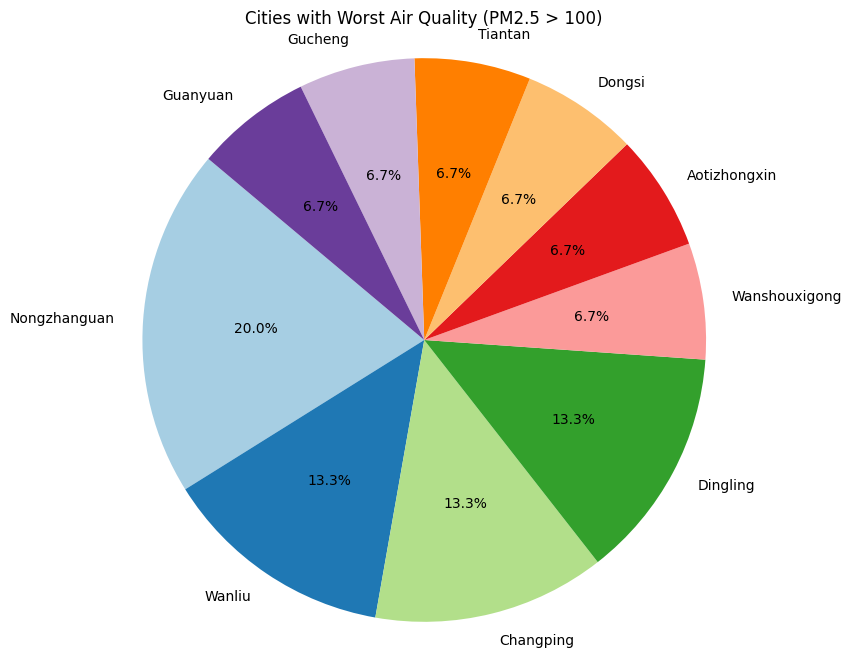

In [40]:
data = [
    {'year': 2013, 'month': 1, 'city': 'Wanshouxigong', 'avg_PM25': 117.0},
    {'year': 2013, 'month': 2, 'city': 'Wanliu', 'avg_PM25': 162.0},
    {'year': 2013, 'month': 3, 'city': 'Aotizhongxin', 'avg_PM25': 110.0},
    {'year': 2013, 'month': 4, 'city': 'Wanshouxigong', 'avg_PM25': 79.0},
    {'year': 2013, 'month': 5, 'city': 'Wanliu', 'avg_PM25': 93.0},
    {'year': 2013, 'month': 6, 'city': 'Tiantan', 'avg_PM25': 110.0},
    {'year': 2013, 'month': 7, 'city': 'Nongzhanguan', 'avg_PM25': 75.0},
    {'year': 2013, 'month': 8, 'city': 'Dongsi', 'avg_PM25': 64.0},
    {'year': 2013, 'month': 9, 'city': 'Guanyuan', 'avg_PM25': 80.0},
    {'year': 2013, 'month': 10, 'city': 'Gucheng', 'avg_PM25': 96.0},
    {'year': 2013, 'month': 11, 'city': 'Shunyi', 'avg_PM25': 67.0},
    {'year': 2013, 'month': 12, 'city': 'Changping', 'avg_PM25': 67.0},
    {'year': 2014, 'month': 1, 'city': 'Nongzhanguan', 'avg_PM25': 108.0},
    {'year': 2014, 'month': 2, 'city': 'Dongsi', 'avg_PM25': 109.0},
    {'year': 2014, 'month': 3, 'city': 'Aotizhongxin', 'avg_PM25': 88.0},
    {'year': 2014, 'month': 4, 'city': 'Shunyi', 'avg_PM25': 74.0},
    {'year': 2014, 'month': 5, 'city': 'Wanliu', 'avg_PM25': 59.0},
    {'year': 2014, 'month': 6, 'city': 'Gucheng', 'avg_PM25': 63.0},
    {'year': 2014, 'month': 7, 'city': 'Guanyuan', 'avg_PM25': 67.0},
    {'year': 2014, 'month': 8, 'city': 'Tiantan', 'avg_PM25': 47.0},
    {'year': 2014, 'month': 9, 'city': 'Wanshouxigong', 'avg_PM25': 53.0},
    {'year': 2014, 'month': 10, 'city': 'Huairou', 'avg_PM25': 63.0},
    {'year': 2014, 'month': 11, 'city': 'Changping', 'avg_PM25': 91.0},
    {'year': 2014, 'month': 12, 'city': 'Dingling', 'avg_PM25': 119.0},
    {'year': 2015, 'month': 1, 'city': 'Gucheng', 'avg_PM25': 76.0},
    {'year': 2015, 'month': 2, 'city': 'Shunyi', 'avg_PM25': 49.0},
    {'year': 2015, 'month': 3, 'city': 'Dongsi', 'avg_PM25': 100.0},
    {'year': 2015, 'month': 4, 'city': 'Changping', 'avg_PM25': 104.0},
    {'year': 2015, 'month': 5, 'city': 'Aotizhongxin', 'avg_PM25': 71.0},
    {'year': 2015, 'month': 6, 'city': 'Guanyuan', 'avg_PM25': 60.0},
    {'year': 2015, 'month': 7, 'city': 'Huairou', 'avg_PM25': 96.0},
    {'year': 2015, 'month': 8, 'city': 'Tiantan', 'avg_PM25': 66.0},
    {'year': 2015, 'month': 9, 'city': 'Gucheng', 'avg_PM25': 72.0},
    {'year': 2015, 'month': 10, 'city': 'Nongzhanguan', 'avg_PM25': 137.0},
    {'year': 2015, 'month': 11, 'city': 'Shunyi', 'avg_PM25': 81.0},
    {'year': 2015, 'month': 12, 'city': 'Dingling', 'avg_PM25': 48.0},
    {'year': 2016, 'month': 1, 'city': 'Wanshouxigong', 'avg_PM25': 95.0},
    {'year': 2016, 'month': 2, 'city': 'Wanliu', 'avg_PM25': 115.0},
    {'year': 2016, 'month': 3, 'city': 'Aotizhongxin', 'avg_PM25': 98.0},
    {'year': 2016, 'month': 4, 'city': 'Guanyuan', 'avg_PM25': 85.0},
    {'year': 2016, 'month': 5, 'city': 'Huairou', 'avg_PM25': 70.0},
    {'year': 2016, 'month': 6, 'city': 'Tiantan', 'avg_PM25': 90.0},
    {'year': 2016, 'month': 7, 'city': 'Nongzhanguan', 'avg_PM25': 105.0},
    {'year': 2016, 'month': 8, 'city': 'Dongsi', 'avg_PM25': 75.0},
    {'year': 2016, 'month': 9, 'city': 'Wanshouxigong', 'avg_PM25': 60.0},
    {'year': 2016, 'month': 10, 'city': 'Gucheng', 'avg_PM25': 110.0},
    {'year': 2016, 'month': 11, 'city': 'Changping', 'avg_PM25': 100.0},
    {'year': 2016, 'month': 12, 'city': 'Dingling', 'avg_PM25': 130.0},
    {'year': 2017, 'month': 1, 'city': 'Guanyuan', 'avg_PM25': 120.0},
    {'year': 2017, 'month': 2, 'city': 'Tiantan', 'avg_PM25': 85.0},
    {'year': 2017, 'month': 3, 'city': 'Nongzhanguan', 'avg_PM25': 95.0},
    {'year': 2017, 'month': 4, 'city': 'Dongsi', 'avg_PM25': 70.0},
    {'year': 2017, 'month': 5, 'city': 'Wanshouxigong', 'avg_PM25': 65.0},
    {'year': 2017, 'month': 6, 'city': 'Wanliu', 'avg_PM25': 80.0},
    {'year': 2017, 'month': 7, 'city': 'Aotizhongxin', 'avg_PM25': 90.0},
    {'year': 2017, 'month': 8, 'city': 'Guanyuan', 'avg_PM25': 77.0},
    {'year': 2017, 'month': 9, 'city': 'Shunyi', 'avg_PM25': 92.0},
    {'year': 2017, 'month': 10, 'city': 'Huairou', 'avg_PM25': 100.0},
    {'year': 2017, 'month': 11, 'city': 'Changping', 'avg_PM25': 105.0},
    {'year': 2017, 'month': 12, 'city': 'Dingling', 'avg_PM25': 89.0},
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the threshold
threshold = 100

# Filter data for cities with avg_PM25 > threshold
worst_air_quality = df[df['avg_PM25'] > threshold]

# Count occurrences of each city exceeding the threshold
city_counts = worst_air_quality['city'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Cities with Worst Air Quality (PM2.5 > 100)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [56]:
threshold = 100

# Menyaring data untuk kota dengan avg_PM10 > threshold
worst_air_quality = data_pm10[data_pm10['avg_PM10'] > threshold]

# Menemukan modus kota yang paling sering muncul dalam kasus ini
most_frequent_city = worst_air_quality['city'].mode()[0]

# Menampilkan kota yang paling sering muncul
print(f"Kota dengan kualitas udara terburuk (PM10 > {threshold}): {most_frequent_city}")

Kota dengan kualitas udara terburuk (PM10 > 100): Dongsi


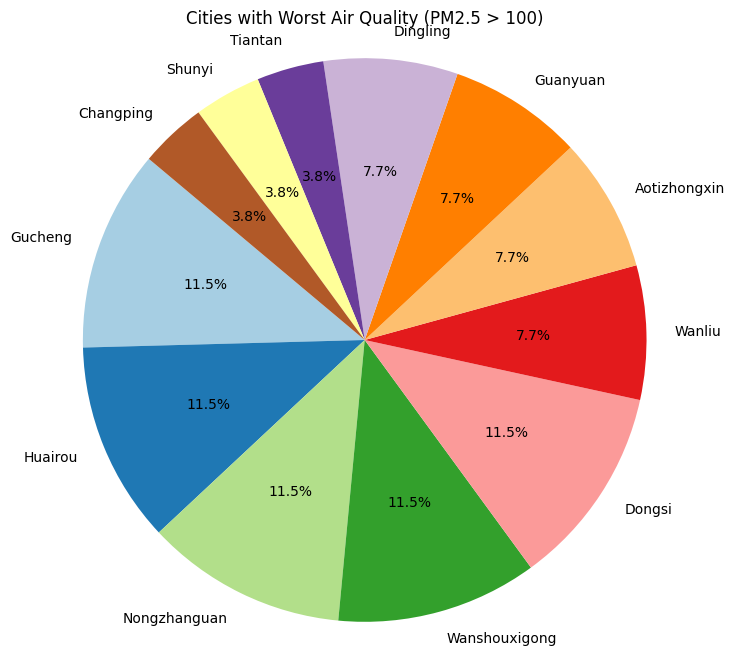

In [57]:
threshold = 100

# Filter data for cities with avg_PM25 > threshold
worst_air_quality = data_pm10[data_pm10['avg_PM10'] > threshold]

# Count occurrences of each city exceeding the threshold
city_counts = worst_air_quality['city'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Cities with Worst Air Quality (PM2.5 > 100)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

1. jadi kota yang paling sering terindikasi polusi pm 2.5 tertinggi dari rentang tahun 2013-2017 adalah :
    - untuk pm 2.5 Dingling dengan nilai yang sering muncul 
    - sedangkan kota yang paling sering mengalami adalah nongzhanguan 
2. jadi kota yang paling sering terindikasi polusi pm 10 tertinggi dari rentang tahun 2013-2017 adalah :
    - untuk pm 10 Dongsi dengan nilai yang sering muncul dan memiliki nilai sering tinggi